In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
import datetime as dt
import pandas_datareader.data as web
import time

### importazione dati

In [16]:
def import_data(name,source='yahoo'):    
    start = dt.datetime(1920, 1, 1, 0, 0)
    end = dt.datetime.now()
    df = web.DataReader(name, source, start, end)
    #Symbol = 'High'
    df.reset_index(inplace=True)
    df.set_index("Date", inplace=True)
    df = df.drop(['Low','Open','Adj Close','High','Volume'],axis='columns')
    return df

In [17]:
# LISTA ETF

#df=import_data(['IWDE.MI','EQQQ.MI','IUSE.MI','XGLE.MI','IBCI.MI','XBLC.MI','XAD1.MI','IMIB.MI','C50.MI','IEEM.MI','IBCX.MI'])   #portafoglio JUSTETF
#df.columns=['Msci','Nasdaq','SP500','EUBond','InflationBond','CorporateBond','Gold','FTSEMib','EUSTOX50','Emergenti','CorporateLargeCup']
#df=df.fillna(method='ffill')

# LISTA ETF FRATERZ

#df=import_data(['LCJP.MI','JREM.L','UST.PA','CS51.L','IHYU.MI'])
#df.columns=['IWDE.MI','IUSE.MI','XGLE.MI','IBCI.MI','XBLC.MI','XAD1.MI']

In [18]:
# LISTA ETF SECONDO PORTAFOGLIO JUSTETF

#df=import_data(['IWDE.MI','IUSE.MI','IEEM.MI','XGLE.MI','IHYG.MI','EMBE.MI','XAD1.MI'])   
#df.columns=['Msci','SP500','Emergenti','EUBond','HighYieldBond','EmergingBond','Gold']

#df=import_data(['IMEU.MI','INAA.MI','IEEM.MI','XMJP.MI','CSPXJ.MI','XAD1.MI'])
#df.columns=['Europa','America','Emergenti','Giappone','Asia-Pacifico','Oro']

df=import_data(['IWDE.MI','IEEM.MI','XGLE.MI','XBLC.MI','XAD1.MI']) 
df.columns=['Msci','Emergenti','EUBond','CorporateBond','Gold']

df=df.fillna(method='ffill')

In [19]:
df[df.index>'2012']

,Msci,Emergenti,EUBond,CorporateBond,Gold
Date,,,,,
2012-01-02,25.684999,28.290001,170.960007,124.010002,127.309998
2012-01-03,25.745001,28.520000,171.029999,124.099998,128.910004
2012-01-04,25.745001,28.514999,171.029999,124.099998,129.279999
2012-01-05,25.745001,28.629999,169.960007,124.099998,129.050003
2012-01-06,25.745001,28.695000,169.960007,124.099998,130.169998
...,...,...,...,...,...
2020-03-31,46.080002,30.025000,246.070007,150.199997,106.570000
2020-04-01,43.974998,29.014999,246.699997,149.970001,105.269997
2020-04-02,43.930000,29.695000,246.729996,149.509995,106.730003


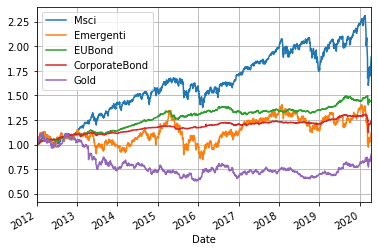

In [20]:
normalizzazione_ETF=np.array(df[df.index=='2012-01-02'])

dfnorm=df/normalizzazione_ETF

dfnorm.plot()
plt.xlim('2012','2020-04-15')
plt.grid()
plt.savefig('grafico_etf.png',dpi=300)
plt.show()

In [21]:
0.55*(1.50**(1/8)-1)*100 + 0.55* (1.6**(1/8)-1)*100

6.187503668040862

### massimo drawdown

10.404868153780614 56


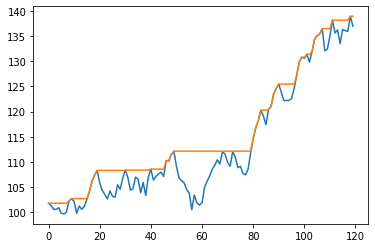

In [22]:
rand_sequence=np.random.normal(3/12,5/np.sqrt(12),size=12*10)
rend_cumulativo=np.cumprod(1+rand_sequence/100)*100


def drawdown(array):
    massimo=array[0]
    lista=[]
    for i in range(len(array)):
        if array[i]>massimo:
            massimo=array[i]
            lista.append(massimo)
        else:
            lista.append(massimo)
     
    lista=np.array(lista)
    
    drawdown_parz=(lista-array)/lista*100
    #print(np.max(drawdown_parz),np.argmax(drawdown_parz))
    
    return (np.max(drawdown_parz),np.argmax(drawdown_parz),lista)


massimo_esp=drawdown(rend_cumulativo)

print(massimo_esp[0],massimo_esp[1])

plt.plot(rend_cumulativo)
plt.plot(massimo_esp[2])
plt.show()

### simulazione benchmark, senza ribilanciamento

In [23]:
p2data=pd.read_csv('p2-rendimento.csv')
p2data.index=pd.to_datetime(p2data.index,format='%d.%m.%Y')
p2data['Data']=p2data['Data']-3.59

p2data['Rendimento']=100000*(1+p2data['Data']/100)

p2data

,Data,rendimento,Rendimento
2020-02-25,0.00,NaN,100000.0
2020-02-26,-0.84,NaN,99160.0
2020-02-27,-1.28,NaN,98720.0
2020-02-28,-2.26,NaN,97740.0
2020-02-29,-4.32,NaN,95680.0
2020-03-02,-4.72,NaN,95280.0
2020-03-03,-4.06,NaN,95940.0
2020-03-04,-4.32,NaN,95680.0
2020-03-05,-3.67,NaN,96330.0
2020-03-06,-4.69,NaN,95310.0


Massimo drawdown  10.606815636416387 %


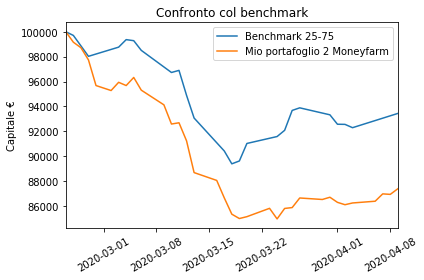

In [24]:
df_sim=df[df.index>='2020-02-22']

df_sim=df_sim[['Msci','EUBond']]

n_obbligazioni=75000/df_sim.iloc[0,1]
n_azioni=25000/df_sim.iloc[0,0]

df_sim['Benchmark']=n_azioni*df_sim['Msci']+n_obbligazioni*df_sim['EUBond']

print('Massimo drawdown ',drawdown(np.array(df_sim['Benchmark']))[0],'%')

plt.plot(df_sim.index,df_sim['Benchmark'],label='Benchmark 25-75')
plt.plot(p2data.index,p2data['Rendimento'],label='Mio portafoglio 2 Moneyfarm')
plt.xticks(rotation=30)
plt.title('Confronto col benchmark')
plt.ylabel('Capitale €')
plt.xlim('2020-02-25','2020-04-09')
plt.legend()
plt.tight_layout()
plt.savefig('benchmark.png',dpi=300)
plt.show()

In [25]:
df_sim.iloc[-1,2]-100000

-5605.740488626645

### simulazione portafoglio

In [26]:
# SIMPLIFIED FOR MULTIPLE ETFS

def rendimento_bis(ripartizione,capitale0=100000,inizio='2012',fine='2020-05',nomietf=['Msci','Emergenti','EUBond','CorporateBond','Gold']):
    
    daysperyear=255
    
    # acquisizione prezzi
    df2=df[(df.index>=inizio) & (df.index<=fine)]
    durata=round(len(df2)/daysperyear,1)
    titoli=np.array(df2[nomietf])
    n_titoli=titoli.shape[1]
    
    
    # ripartizione iniziale
    ripartizione=np.array(ripartizione)
    cap_rip=ripartizione/100*capitale0
    
    num_rip=cap_rip/titoli[0,:]
    capitale2=np.random.rand(len(df2),n_titoli+2)
    
    rend_annuo_bar=[]
    
    kk=-1
    
    # evoluzione
    for i in range(len(df2)):
        capitale2[i,0]=round(i/daysperyear,2)
        for j in range(1,n_titoli+1):
            capitale2[i,j]=num_rip[j-1]*titoli[i,j-1]
        
        capitale2[i,n_titoli+1]=np.sum(capitale2[i,1:n_titoli+1])
        kk=kk+1
        
    # ribilanciamento
        if kk==255:
            cap_rip=ripartizione/100*capitale2[i,n_titoli+1]
            num_rip=cap_rip/titoli[i,:]
            #print(num_rip,capitale2[i,n_titoli+1])
            # rendimento annuale nella lista
            rannuo_bar=np.round((capitale2[i,n_titoli+1]/capitale2[i-daysperyear,n_titoli+1]-1)*100,2)
            #print(capitale2[i,n_titoli+1],capitale2[i-255,n_titoli+1],i,i-255)
            rend_annuo_bar.append([df2.index[i].year-1,rannuo_bar])
            #print(df2.index[i])
            # azzero il contatore kk (responsabile del bilanciamento annuale)
            kk=0
    
    
    # rendimento annualizzato
    rend_annualizzato=round(((capitale2[i,n_titoli+1]/capitale0)**(1/durata)-1)*100,2)
    
    array_finale=capitale2[:,n_titoli+1]
    
    # massima perdita
    maxdrowdawn=round(drawdown(array_finale)[0],2)
    drowdawn_when=round(drawdown(array_finale)[1]/daysperyear,2)
    
    return (capitale2,rend_annualizzato,maxdrowdawn,drowdawn_when,np.array(rend_annuo_bar))

rendimento  5.59 % - massima perdita  11.31 % - dopo  8.14 anni


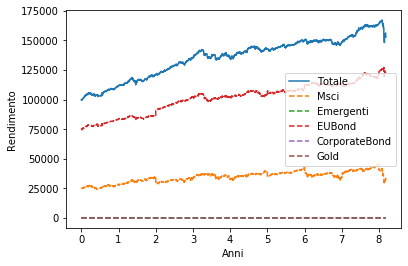

In [27]:
peppe_completo=rendimento_bis([25,0,75,0,0],inizio='2012',fine='2020-05')

peppe=peppe_completo[0]
print('rendimento ',peppe_completo[1],'% - massima perdita ',peppe_completo[2],'% - dopo ',peppe_completo[3],'anni')

xticks_str=[]
xticks_num=np.arange(0,9,1)

for i in range(len(xticks_num)):
    xticks_str.append(str(xticks_num[i]+2012))

plt.plot(peppe[:,0],peppe[:,6],label='Totale')
plt.plot(peppe[:,0],peppe[:,1],label='Msci',linestyle='--')
plt.plot(peppe[:,0],peppe[:,2],label='Emergenti',linestyle='--')
plt.plot(peppe[:,0],peppe[:,3],label='EUBond',linestyle='--')
plt.plot(peppe[:,0],peppe[:,4],label='CorporateBond',linestyle='--')
plt.plot(peppe[:,0],peppe[:,5],label='Gold',linestyle='--')
#plt.xticks(xticks_num,xticks_str)
plt.xlabel('Anni')
plt.ylabel('Rendimento')
#plt.ylim(0,500000)
#plt.xlim(8,8.18)
plt.legend()
plt.show()

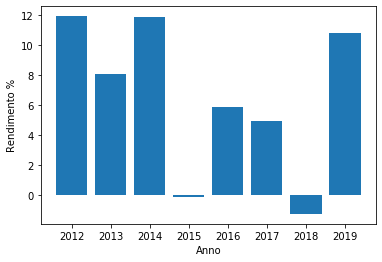

In [28]:
plt.bar(peppe_completo[4][:,0],peppe_completo[4][:,1])
plt.xlabel('Anno')
plt.ylabel('Rendimento %')
plt.savefig('output_portfolio/rendimenti-annuali.png')
plt.show()

### analisi rischio rendimento

In [29]:
def rischio_rendimento(array,start='2012',end='2021',nomietf=['Msci','EUBond','Gold']):
    risultato=rendimento_bis(array,capitale0=100000,inizio=start,fine=end,nomietf=nomietf)
    return (risultato[1],risultato[2])

In [30]:
rischio_rendimento([55,40,5],start='2012',end='2020-02-22')

(8.0, 10.33)

In [31]:
# genero le combinazioni

valori=[]
n_val=40    # aumentare per avere maggiori combinazioni

for i in range(0,n_val+1):
    for j in range(0,n_val+1-i):
        k=n_val-i-j
        valori.append([i,j,k])
        #for m in range(0,n_val+1-i-j):
            #for n in range(0,n_val+1-i-j-m):
                
                
                
valori=np.array(valori)*(100/n_val)

In [32]:
print(valori)

print(np.mean(np.sum(valori,axis=1)))

print(len(valori))

[[  0.    0.  100. ]
 [  0.    2.5  97.5]
 [  0.    5.   95. ]
 ...
 [ 97.5   0.    2.5]
 [ 97.5   2.5   0. ]
 [100.    0.    0. ]]
100.0
861


In [33]:
# analisi rischio rendimento con le combinazioni create in precedenza

rr_val=[]
costi=0.4    # costi degli ETF
counter=0
for i in range(len(valori)):
    rr_parz=rischio_rendimento(valori[i,:],start='2012',end='2020-05')
    r_netto=(rr_parz[1]-0.2)*0.75
    rr_val.append([i,rr_parz[0]-costi,rr_parz[1],np.abs(rr_parz[1]/(rr_parz[0]-costi)),valori[i,0],valori[i,1],valori[i,2]])
    counter=counter+1
    if counter==100:
        stage=int(i/len(valori)*100)
        counter=0
        print(stage,'%')

11 %


/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


23 %
34 %
46 %
57 %
69 %
81 %
92 %


In [34]:
df_rr=pd.DataFrame(rr_val)
df_rr.to_csv('rischio-rendimento.csv',index=False)
#df_rr.to_csv('rischio-rendimento-precrisi.csv',index=False)
#df_rr=pd.read_csv('rischio-rendimento.csv')
df_rr.columns=['ID','rendimento','max perdita','anni per recuperare','Msci','EUBond','Gold']
rr_val=np.array(df_rr)

### presentazione dei risultati

In [35]:
arg_massimo=np.argmin(rr_val[:,3])

In [36]:
df_rr.iloc[arg_massimo,:]

ID                      40.000000
rendimento               4.120000
max perdita              6.140000
anni per recuperare      1.490291
Msci                     0.000000
EUBond                 100.000000
Gold                     0.000000
Name: 40, dtype: float64

2.5272852155516556
4.248970767593341


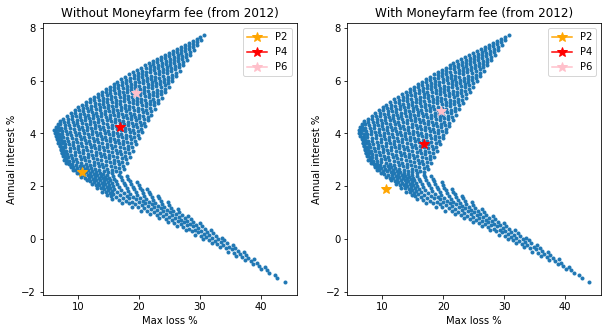

In [37]:
x_rr=df_rr['max perdita']
y_rr=df_rr['rendimento']

costi_mfarm=0.65

#p2_rend=((121/115.6)**(1/5)-1)*100
#p4_rend=((136.1/124.3)**(1/5)-1)*100

p2_rend=((122.1/100)**(1/8)-1)*100
p4_rend=((139.5/100)**(1/8)-1)*100
p6_rend=((153.6/100)**(1/8)-1)*100


print(p2_rend)
print(p4_rend)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_rr,y_rr,'.')
plt.xlabel('Max loss %')
plt.ylabel('Annual interest %')
plt.plot(10.6,p2_rend,marker='*',color='orange',markersize=11,label='P2')
plt.plot(16.9,p4_rend,marker='*',color='red',markersize=11,label='P4')
plt.plot(19.6,p6_rend,marker='*',color='pink',markersize=11,label='P6')
#plt.plot(15.33,5.09,marker='*',color='cyan',markersize=11,label='My Portfolio')
plt.title('Without Moneyfarm fee (from 2012)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x_rr,y_rr,'.')
plt.xlabel('Max loss %')
plt.ylabel('Annual interest %')
plt.plot(10.6,p2_rend-costi_mfarm,marker='*',color='orange',markersize=11,label='P2')
plt.plot(16.9,p4_rend-costi_mfarm,marker='*',color='red',markersize=11,label='P4')
plt.plot(19.6,p6_rend-costi_mfarm,marker='*',color='pink',markersize=11,label='P6')
#plt.plot(15.33,5.09-0.07,marker='*',color='cyan',markersize=11,label='My Portfolio')
plt.title('With Moneyfarm fee (from 2012)')
plt.legend()
plt.savefig('output_portfolio/risk-interest.png',dpi=300)
plt.show()

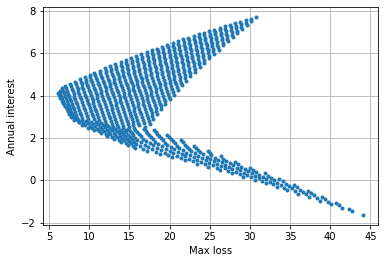

In [38]:
plt.plot(x_rr,y_rr,'.')
plt.xlabel('Max loss')
plt.ylabel('Annual interest')
plt.grid()
plt.savefig('output_portfolio/risk-interest-general.png',dpi=300)
plt.show()

In [39]:
max_perdita=(4861/26500)*100

df_sub=df_rr[df_rr['max perdita']<=max_perdita]
#df_sub=df_rr[df_rr['max perdita']<=18]
df_sub=df_rr

In [40]:
pos_max=df_sub['rendimento'].argmax()
df_sub.loc[pos_max]

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


ID                     860.000000
rendimento               7.710000
max perdita             30.770000
anni per recuperare      3.990921
Msci                   100.000000
EUBond                   0.000000
Gold                     0.000000
Name: 860, dtype: float64

In [41]:
#df_sub_sorted=df_sub.sort_values(by='rendimento',ascending=False)
df_sub_sorted=df_sub.sort_values(by='max perdita',ascending=True)
#df_sub_sorted=df_sub.sort_values(by='anni per recuperare',ascending=True)


# THIS SHOWS ONLY PORTOFLIO WITH ALL 5 ETFS

#mask_subdf=(df_sub_sorted[['Msci','Emergenti','EUBond','CorporateBond','Gold']]!=0).sum(axis=1)==5
#mask_subdf=(df_sub_sorted[['Gold']]).sum(axis=1)==5
#df_sub_sorted=df_sub_sorted.loc[mask_subdf,:]
#df_sub_sorted.iloc[0,[1,2]]

In [42]:
# inserisco la massima perdita del 2020

#portafogli_scelti=np.array(df_sub_sorted[['Msci','EUBond','Gold']])
#perdita2020=[]

#for i in portafogli_scelti:
#    perdita2020.append(rischio_rendimento(i,start='2020',end='2020-05')[1])
    
#df_sub_sorted['max perdita 2020']=perdita2020

In [43]:
df_sub_sorted.head(20)

,ID,rendimento,max perdita,anni per recuperare,Msci,EUBond,Gold
40,40,4.12,6.14,1.490291,0.0,100.0,0.0
39,39,4.01,6.22,1.551122,0.0,97.5,2.5
79,79,4.12,6.37,1.546117,2.5,95.0,2.5
80,80,4.24,6.39,1.507075,2.5,97.5,0.0
38,38,3.89,6.41,1.647815,0.0,95.0,5.0
78,78,4.00,6.49,1.622500,2.5,92.5,5.0
37,37,3.77,6.60,1.750663,0.0,92.5,7.5
77,77,3.88,6.62,1.706186,2.5,90.0,7.5
119,119,4.35,6.67,1.533333,5.0,95.0,0.0
118,118,4.23,6.69,1.581560,5.0,92.5,2.5


### massimo rendimento e minima perdita

In [44]:
def maxrend_minperd(perdmin,perdmax):
    df_rendpend=df_sub_sorted.loc[(df_sub_sorted['max perdita']>=perdmin) &(df_sub_sorted['max perdita']<perdmax)]
    rendimento=np.round(df_rendpend.sort_values(by='rendimento',ascending=False).iloc[0,1],2)
    portafoglio=np.array(df_rendpend.sort_values(by='rendimento',ascending=False).iloc[0,4:7])
    return (rendimento,portafoglio)

5.46 -- 7.25 (4.46, array([ 7.5, 92.5,  0. ])) 7.0
7.25 -- 9.04 (4.78, array([15., 85.,  0.])) 8.83
9.04 -- 10.83 (5.09, array([22.5, 77.5,  0. ])) 10.66
10.83 -- 12.63 (5.39, array([30., 70.,  0.])) 12.61
12.63 -- 14.42 (5.58, array([35., 65.,  0.])) 13.9
14.42 -- 16.21 (5.87, array([42.5, 57.5,  0. ])) 15.85
16.21 -- 18.0 (6.14, array([50., 50.,  0.])) 17.79


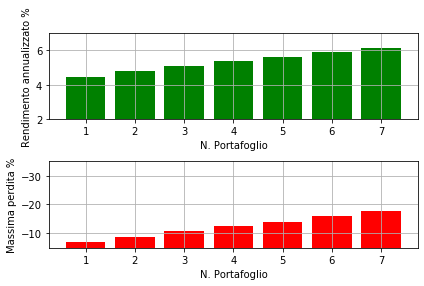

In [45]:
lista_rend_perd=[]

#portafogli_range=np.linspace(6,30,8)
portafogli_range=np.linspace(5.46,18,8)

for i in range(len(portafogli_range)-1):
    #print(i,maxrend_minperd(i,i+1))
    peppino=maxrend_minperd(portafogli_range[i],portafogli_range[i+1])
    print(np.round(portafogli_range[i],2),'--',np.round(portafogli_range[i+1],2),peppino,rischio_rendimento(peppino[1])[1])
    lista_rend_perd.append([i+1,peppino[0],rischio_rendimento(peppino[1])[1]])

lista_rend_perd=np.array(lista_rend_perd)
lista_rend_perd_gold5=np.array([[ 1        ,  4.41      ],
       [ 2,  4.83      ],
       [3,  5.09      ],
       [4,  5.42      ],
       [5,  5.7       ],
       [6,  5.86      ],
       [7,  6.04      ]])

plt.subplot(2,1,1)
plt.bar(lista_rend_perd[:,0],lista_rend_perd[:,1],color='green')
plt.xlabel('N. Portafoglio')
plt.ylabel('Rendimento annualizzato %')
plt.ylim(2,7)
plt.grid()
plt.subplot(2,1,2)
plt.bar(lista_rend_perd[:,0],-lista_rend_perd[:,2],color='red')
#plt.bar(lista_rend_perd_gold5[:,0],lista_rend_perd_gold5[:,1],label='With gold 5%')
plt.xlabel('N. Portafoglio')
plt.ylabel('Massima perdita %')
plt.grid()
plt.ylim(-5,-35)
#plt.ylim(3,7)
#plt.legend()
plt.tight_layout()
plt.savefig('output_portfolio/rend-perdita.png',dpi=300)
plt.show()

In [46]:
#for i in range(15):
#    df=import_data(['IWDE.MI','IEEM.MI','XGLE.MI','IBCX.MI','XAD1.MI'])   
#    df.columns=['Msci','Emergenti','EUBond','CorporateLargeCup','Gold']
#    print(df.iloc[-1,:])
#    time.sleep(60)

### rendimenti pre crisi - perdita durante crisi (con 20% di oro nella quota azionaria)

In [47]:
def rend_rischio_crisi(x):
    costi=0.4
    rendimento=round(rischio_rendimento([x,100-x,0],start='2012',end='2020-02-22')[0]-costi,2)
    rischio=rischio_rendimento([x,100-x,0],start='2020',end='2020-05')[1]
    return rendimento,rischio

rend_rischio_crisi_vec=np.vectorize(rend_rischio_crisi)

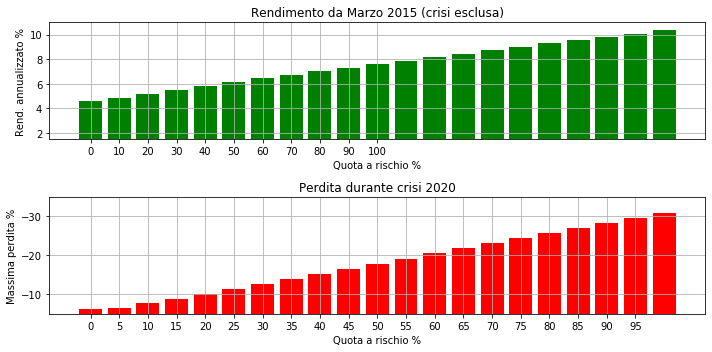

In [54]:
xgrid=np.arange(0,21,1)
ygridpos=rend_rischio_crisi_vec(xgrid*5)[0]
ygridneg=rend_rischio_crisi_vec(xgrid*5)[1]

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.bar(xgrid,ygridpos,color='green')
plt.xlabel('Quota a rischio %')
plt.ylabel('Rend. annualizzato %')
plt.xticks(np.arange(0,11,1),np.arange(0,110,10))
plt.ylim(1.5,11)
plt.title('Rendimento da Marzo 2015 (crisi esclusa)')
plt.grid()
plt.subplot(2,1,2)
plt.bar(xgrid,-ygridneg,color='red')
#plt.bar(lista_rend_perd_gold5[:,0],lista_rend_perd_gold5[:,1],label='With gold 5%')
plt.xlabel('Quota a rischio %')
plt.ylabel('Massima perdita %')
plt.title('Perdita durante crisi 2020')
plt.grid()
plt.xticks(np.arange(0,20,1),np.arange(0,105,5))
plt.ylim(-5,-35)
#plt.ylim(3,7)
#plt.legend()
plt.tight_layout()
plt.savefig('output_portfolio/rend-perdita2.png',dpi=300)
plt.show()

In [49]:
df_rend=pd.DataFrame(xgrid*5,columns=['Quota a rischio %'])

df_rend['Quota azionaria %']=xgrid*5
df_rend['Oro %']=xgrid*10*0
df_rend['Quota obbligazionaria %']=100-xgrid*5

df_rend['Rendimento dal 2015-03 (crisi esclusa) %']=ygridpos
df_rend['Perdita nel 2020 %']=ygridneg

df_rend

,Quota a rischio %,Quota azionaria %,Oro %,Quota obbligazionaria %,Rendimento dal 2015-03 (crisi esclusa) %,Perdita nel 2020 %
0,0,0,0,100,4.58,6.12
1,5,5,0,95,4.89,6.61
2,10,10,0,90,5.21,7.65
3,15,15,0,85,5.52,8.89
4,20,20,0,80,5.83,10.12
5,25,25,0,75,6.14,11.40
6,30,30,0,70,6.44,12.70
7,35,35,0,65,6.74,14.00
8,40,40,0,60,7.03,15.31
9,45,45,0,55,7.33,16.61


In [50]:
p2=((1+((132.2-120.6)/120.6))**(1/5)-1)*100-0.7
p4=((1+((158.3-133.3)/133.3))**(1/5)-1)*100-0.7

print('Rendimento portafoglio 2 Moneyfarm dal 2015',round(p2,1),'%')
print('Rendimento portafoglio 4 Moneyfarm dal 2015',round(p4,1),'%')

Rendimento portafoglio 2 Moneyfarm dal 2015 1.2 %
Rendimento portafoglio 4 Moneyfarm dal 2015 2.8 %


In [51]:
(33500)*(1+p2/100)**9+4200*(1+p4/100)**9

42527.213317372945

In [52]:
(26500-4320)*(1.0357)**5.08

26506.362993043575

In [53]:
(18230-4320)*(1.0547)**5.08

18231.490510198986